In [62]:
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt

Here I am setting my support and extracting from the csv file

In [63]:
support = 18
df = pd.read_csv('Groceries_dataset.csv')

I am comptuting in Occuences how many times each item was purchased 
In preprocess I am making a dictionary of Customer : All Items Bought

In [64]:

def occurences(df, support):
    data = {}

    count = df['itemDescription'].value_counts(ascending=False)
    for key, value in count.iteritems():
        if value > support:
            data[key] = value
    return data



def preprocess(df, support):
    data = {}
    finalData = {}
    grouped = df.groupby(['Member_number', 'itemDescription'])
    for name, group in grouped['Member_number']:
        key = name[0]
        value = name[1]
        # print(key)
        # print(value)
        if key in data.keys():
            data[key].append(value)
        else:
             data[key] = [value]
    for key, value in data.items():
        if len(value) > support:
            finalData[key] = value

    return finalData
    
itemOccurence = occurences(df, support)
customerItems = preprocess(df, support)



Here I am showing a visual of the top 25 most bought items. I cannot show all the items since the graph would become very cluttered.

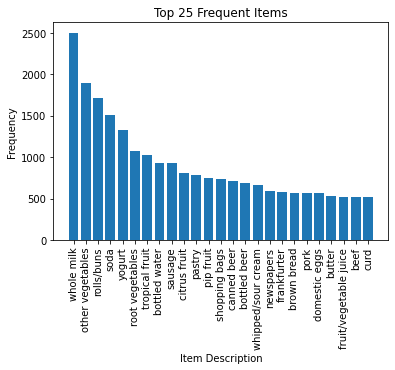

In [65]:
itemDictTop = dict(sorted(itemOccurence.items(), key=lambda x: x[1], reverse=True)[:25])

itemKey = itemDictTop.keys()
itemValue = itemDictTop.values()
plt.bar(itemKey, itemValue)
plt.title("Top 25 Frequent Items")
plt.xlabel("Item Description")
plt.ylabel("Frequency")
plt.tick_params(axis='x', rotation=90)
plt.show()

Here I am computing the amount of times a (item 1, item2) occur in a customers cart in pass1
In pairConfidence I am computing the confidence scores oh each (item1, item2)

In [66]:
def pass1(itemOccurence, customerItems, support):
    counter = {}
    finalCounter = {}
    combos = list(it.combinations(itemOccurence.keys(), 2))

    for key in combos:
        for value in customerItems.values():
            if key[0] in value and key[1] in value:
                if key not in counter.keys():
                    counter[key] = 1
                else:
                    counter[key] += 1
    for key, value in counter.items():
        if value > support:
            finalCounter[key] = value
    return finalCounter

def pairConfidence(p1, p2):
    confidence = {}
    for key in p2.keys():
        confidence[(key[0], key[1])] =  p2[key] / p1[key[0]]

        confidence[(key[1], key[0])] =  p2[key] / p1[key[1]]
    return dict(sorted(confidence.items(), key = lambda x:x[1],reverse=True))

p1Data = pass1(itemOccurence, customerItems, support)
pairs = pairConfidence(itemOccurence, p1Data)



Here I am printing out a visual of the top 10 most bought (item 1, item2) pairs

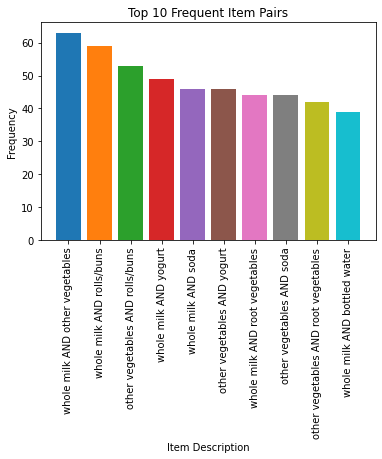

In [75]:
p1GraphData = dict(sorted(p1Data.items(), key = lambda x:x[1],reverse=True)[:10])

for key, value in p1GraphData.items():
    x = key[0]
    y = key[1]
    a = x + " AND " + y
    z = value
    plt.bar(a, z)
plt.title("Top 10 Frequent Item Pairs")
plt.xlabel("Item Description")
plt.ylabel("Frequency")
plt.tick_params(axis='x', rotation=90)
plt.show()

Here I am printing out the top 10 pairsCondince scores 

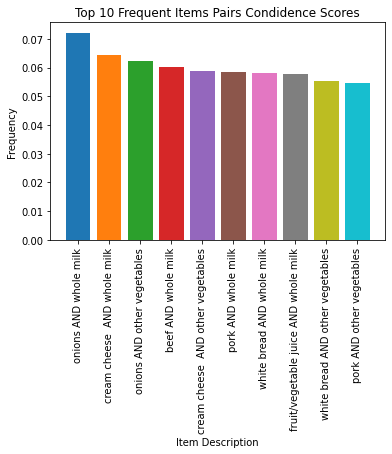

In [76]:
pairsGraphData = dict(sorted(pairs.items(), key = lambda x:x[1],reverse=True)[:10])
for key, value in pairsGraphData.items():
    x = key[0]
    y = key[1]
    a = x + " AND " + y
    z = value
    plt.bar(a, z)
plt.title("Top 10 Frequent Items Pairs Condidence Scores")
plt.xlabel("Item Description")
plt.ylabel("Frequency")
plt.tick_params(axis='x', rotation=90)
plt.show()

Here I am now computing the occurence that (item1, item2, item3) occur in a customers cart in pass2
Then i am computing the triplesConfidence of (item1, item2, item3)


In [69]:
def pass2(itemOccurence, customerItems, p1Data, support):
    counter = {}
    finalCounter = {}
    combos = list(it.combinations(itemOccurence.keys(), 3))

    for key in combos:
        a = key[0]
        b = key[1]
        c = key[2]

        if (a,b) not in p1Data.keys() or (a,c) not in p1Data.keys() or (b,c) not in p1Data.keys():
            continue
        else:
            for value in customerItems.values():
                if a in value and b in value and c in value:
                    if key not in counter.keys():
                        counter[key] = 1
                    else:
                        counter[key] += 1



    for key, value in counter.items():
        if value > support:
            finalCounter[key] = value
    return finalCounter

def tripleConfidence(p1, p2, p3):
    confidence = {}
    for key in p3.keys():
        d = p2.get((key[0], key[2])) or p2.get((key[2], key[0]))
        confidence[(key[0],key[2],key[1])] = p3[key] / d

        d = p2.get((key[0], key[1])) or p2.get((key[1], key[0]))
        confidence[(key[0],key[1],key[2])] = p3[key] / d

        d = p2.get((key[1], key[2])) or p2.get((key[2], key[1]))
        confidence[(key[1],key[2],key[0])] = p3[key] / d


    return dict(sorted(confidence.items(), key = lambda x:x[1],reverse=True))


p2Data = pass2(itemOccurence, customerItems, p1Data,support)
triples = tripleConfidence(itemOccurence, p1Data, p2Data)

Here I am visualizing the top 10 most boughts items of 3

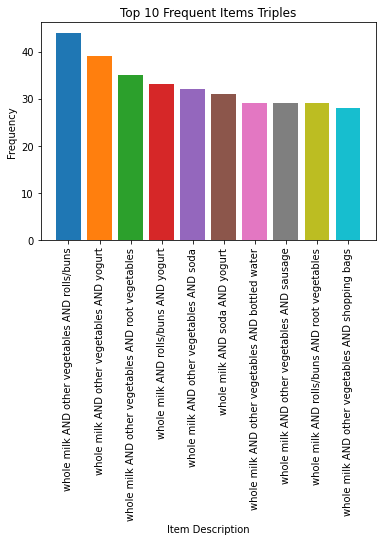

In [77]:
p2GraphData = dict(sorted(p2Data.items(), key = lambda x:x[1],reverse=True)[:10])
for key, value in p2GraphData.items():
    x = key[0]
    y = key[1]
    z = key[2]
    a = x + " AND " + y + " AND " + z
    b = value
    plt.bar(a, b)
plt.title("Top 10 Frequent Items Triples")
plt.xlabel("Item Description")
plt.ylabel("Frequency")
plt.tick_params(axis='x', rotation=90)
plt.show()

Here I am visualizing the top 10 triples pair confidence 

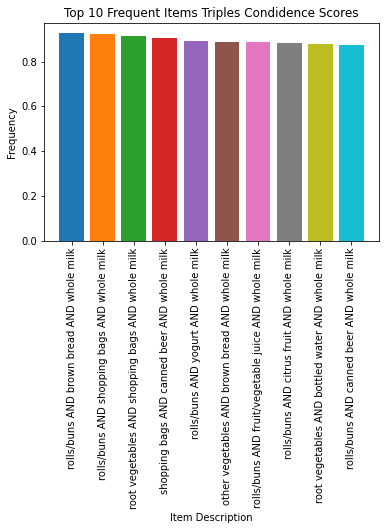

In [78]:
triplesGraphData = dict(sorted(triples.items(), key = lambda x:x[1],reverse=True)[:10])
for key, value in triplesGraphData.items():
    x = key[0]
    y = key[1]
    z = key[2]
    a = x + " AND " + y + " AND " + z
    b = value
    plt.bar(a, b)
plt.title("Top 10 Frequent Items Triples Condidence Scores")
plt.xlabel("Item Description")
plt.ylabel("Frequency")
plt.tick_params(axis='x', rotation=90)
plt.show()

Here I am computing the number of items (item1, item2, item3, item4) are bought in a customers cart in pass3
I am then computing the confidence score of all 4 in quadsConfidence 

In [72]:
def pass3(itemOccurence, customerItems, p2Data, support):
    counter = {}
    finalCounter = {}
    combos = list(it.combinations(itemOccurence.keys(), 4))

    for key in combos:
        a = key[0]
        b = key[1]
        c = key[2]
        d = key[3]
        if (a,b,c) not in p2Data.keys() or (a,b,d) not in p2Data.keys() or (a,c,d) not in p2Data.keys() or (b,c,d) not in p2Data.keys():
            continue
        else:
            for value in customerItems.values():
                if a in value and b in value and c in value and d in value:
                    if key not in counter.keys():
                        counter[key] = 1
                    else:
                        counter[key] += 1



    for key, value in counter.items():
        if value > support:
            finalCounter[key] = value
    return finalCounter

def quadConfidence(p1,p2, p3, p4):
    confidence = {}
    for key in p4.keys():
        d = p3.get((key[0], key[2], key[3])) or p3.get((key[2], key[0], key[3])) or p3.get((key[3], key[2], key[0]))
        confidence[(key[0],key[2],key[3],key[1])] = p4[key] / d

        d = p3.get((key[0], key[1], key[3])) or p3.get((key[1], key[0], key[3])) or p3.get((key[3], key[1], key[0]))
        confidence[(key[0],key[1],key[3],key[2])] = p4[key] / d

        d = p3.get((key[1], key[2], key[3])) or p3.get((key[2], key[1], key[3])) or p3.get((key[3], key[2], key[1]))
        confidence[(key[1],key[2],key[3],key[0])] = p4[key] / d

        d = p3.get((key[0], key[1], key[2])) or p3.get((key[1], key[0], key[2])) or p3.get((key[2], key[0], key[1]))
        confidence[(key[0],key[1],key[2],key[3])] = p4[key] / d

    return dict(sorted(confidence.items(), key = lambda x:x[1],reverse=True))


p3Data = pass3(itemOccurence, customerItems, p2Data, support)
quads = quadConfidence(itemOccurence, p1Data, p2Data, p3Data)

Here I am visualizing the top 10 quads items bought together for each customer

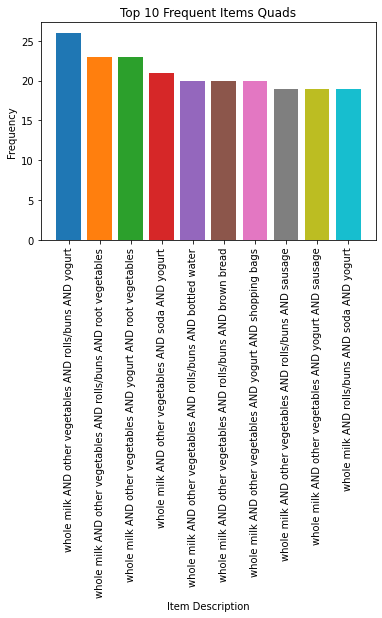

In [79]:
p3GraphData = dict(sorted(p3Data.items(), key = lambda x:x[1],reverse=True)[:10])
for key, value in p3GraphData.items():
    x = key[0]
    y = key[1]
    z = key[2]
    a = key[3]
    b = x + " AND " + y + " AND " + z + " AND " + a
    c = value
    plt.bar(b, c)
plt.tick_params(axis='x', rotation=90)
plt.title("Top 10 Frequent Items Quads")
plt.xlabel("Item Description")
plt.ylabel("Frequency")
plt.show()

Here I am visualing the top 10 confidence scores of each 4 itens bought together

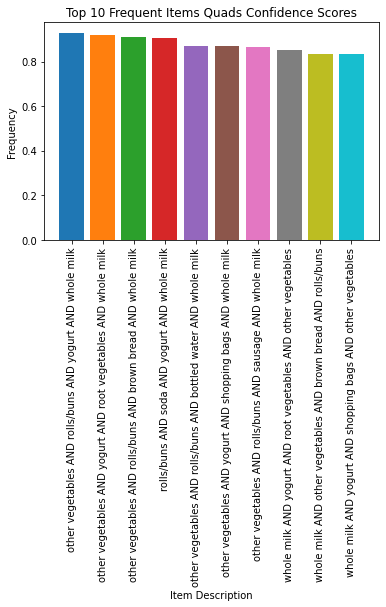

In [80]:
quadConfidenceGraph = dict(sorted(quads.items(), key = lambda x:x[1],reverse=True)[:10])
for key, value in quadConfidenceGraph.items():
    x = key[0]
    y = key[1]
    z = key[2]
    a = key[3]
    b = x + " AND " + y + " AND " + z + " AND " + a
    c = value
    plt.bar(b, c)
plt.tick_params(axis='x', rotation=90)
plt.title("Top 10 Frequent Items Quads Confidence Scores")
plt.xlabel("Item Description")
plt.ylabel("Frequency")
plt.show()
